# Simulated Annealing Demo

Skrypt przedstawia przykładową implementację algorytmu symulowanego wyżarzania (ang. Simulated Annealing, SA) i jego zastosowanie do rozwiązywania problemu Quadratic Assignment Problem (QAP). Problem jest dokładnie opisany m.in. w pracy Burkarda i innych [1]. Popularne instancje problemu QAP można znaleźć w bibliotece QAPLib [2]. Skrypt skupia się na rozwiązywaniu instancji NUG12 [3], w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu.

Literatura:

[1]  Burkard, R., Cela, E., Pardalos, P., Pitsoulis, L., "The Quadratic Assignment Problem", http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.217.1914

[2] QAPLIB, http://anjos.mgi.polymtl.ca/qaplib/

[3] NUG12, http://anjos.mgi.polymtl.ca/qaplib/data.d/nug12.dat

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request

%matplotlib inline

In [2]:
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug12.dat'

## Reading input data

In [3]:
qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)

line = qap_instance_file.readline()
n = int(line.decode()[:-1].split()[0])
print('Problem size: %d' % n)

A = np.empty((n, n))
qap_instance_file.readline()
for i in range(n):
    line = qap_instance_file.readline()
    A[i, :] = list(map(int, line.decode()[:-1].split()))
print('Flow matrix:\n', A)

B = np.empty((n, n))
qap_instance_file.readline()
for i in range(n):
    line = qap_instance_file.readline()
    B[i, :] = list(map(int, line.decode()[:-1].split()))
print('Distance matrix:\n', B)

Problem size: 12
Flow matrix:
 [[ 0.  1.  2.  3.  1.  2.  3.  4.  2.  3.  4.  5.]
 [ 1.  0.  1.  2.  2.  1.  2.  3.  3.  2.  3.  4.]
 [ 2.  1.  0.  1.  3.  2.  1.  2.  4.  3.  2.  3.]
 [ 3.  2.  1.  0.  4.  3.  2.  1.  5.  4.  3.  2.]
 [ 1.  2.  3.  4.  0.  1.  2.  3.  1.  2.  3.  4.]
 [ 2.  1.  2.  3.  1.  0.  1.  2.  2.  1.  2.  3.]
 [ 3.  2.  1.  2.  2.  1.  0.  1.  3.  2.  1.  2.]
 [ 4.  3.  2.  1.  3.  2.  1.  0.  4.  3.  2.  1.]
 [ 2.  3.  4.  5.  1.  2.  3.  4.  0.  1.  2.  3.]
 [ 3.  2.  3.  4.  2.  1.  2.  3.  1.  0.  1.  2.]
 [ 4.  3.  2.  3.  3.  2.  1.  2.  2.  1.  0.  1.]
 [ 5.  4.  3.  2.  4.  3.  2.  1.  3.  2.  1.  0.]]
Distance matrix:
 [[  0.   5.   2.   4.   1.   0.   0.   6.   2.   1.   1.   1.]
 [  5.   0.   3.   0.   2.   2.   2.   0.   4.   5.   0.   0.]
 [  2.   3.   0.   0.   0.   0.   0.   5.   5.   2.   2.   2.]
 [  4.   0.   0.   0.   5.   2.   2.  10.   0.   0.   5.   5.]
 [  1.   2.   0.   5.   0.  10.   0.   0.   0.   5.   1.   1.]
 [  0.   2.   0.   2.  

## Objective function

In [4]:
def qap_objective_function(p):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s

In [5]:
p = [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]
print(qap_objective_function(p), p)

578.0 [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]


## Random Sampling

In [6]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = qap_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(qap_objective_function(p), p)

127.58806014060974
600.0 [ 4  6  7  3  5 10  8 11  9  1  2  0]


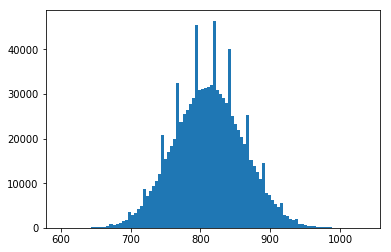

812.041112 49.6944061822


In [7]:
plt.figure()
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [6]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [9]:
T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())

81.28997874259949 578.0


In [7]:
def qap_sa(T = 250000):
    radius = 1
    alpha = 1.0
        
    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost
    
    return costs.min()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

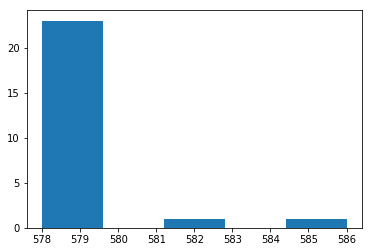

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

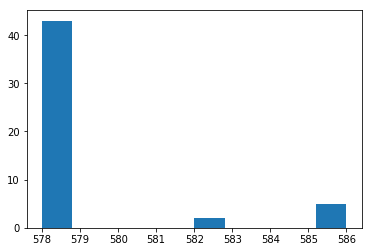

51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 

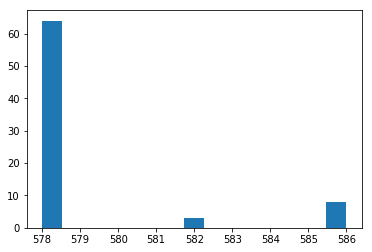

76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

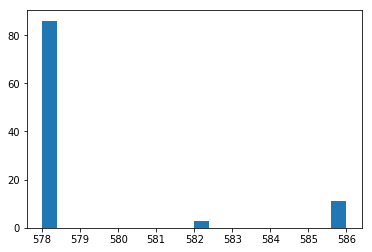

101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 

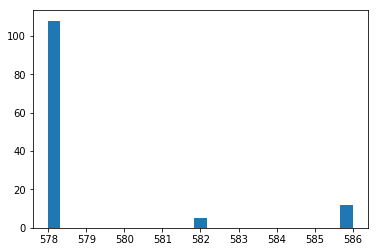

126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 

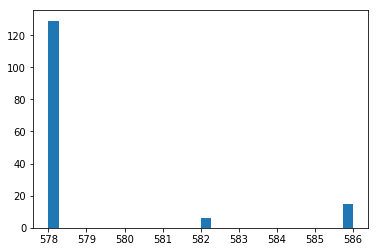

151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 

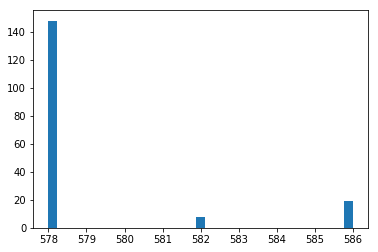

176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 

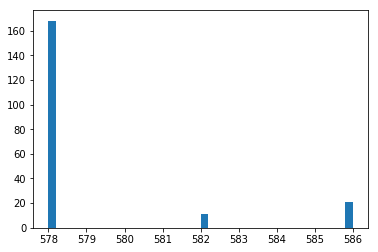

201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 

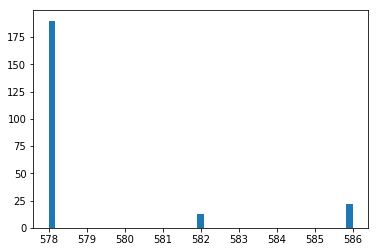

226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 

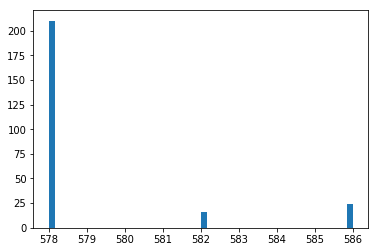

251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 

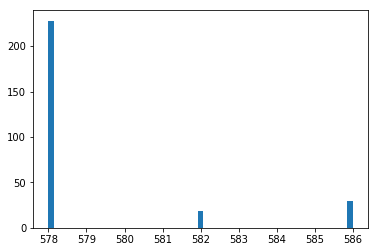

276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 579.093333333 2.56735055824
9853.71424984932


In [11]:
t0 = time.time()

T = 300

costs = np.zeros(T)
for i in range(T):
    print(i, end=" ")
    costs[i] = qap_sa()
    if i > 0 and i % 25 == 0:
        plt.figure()
        plt.hist(costs[:i], bins=i//5 or 1)
        plt.show()

print(costs.mean(), costs.std())

print(time.time() - t0)